In [1]:
import os
from os.path import isdir, join

from pathlib import Path
import pandas as pd
import time
#loadmat
from scipy.io import loadmat,savemat

# Math
import numpy as np
from scipy.fftpack import fft, dct
from scipy import signal
from scipy.stats import norm,multivariate_normal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

#math
import math

%matplotlib inline

# Frame the problem

this is a simple multi-class recognition problem for recognizing the speaker

# 1. Import data

In [2]:
#audio_path = "C:\\Users\\hasee\\workspace\\lab\\patRecDat\\forStudents\\timit\\test"
audio_path = "/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/timit/test"

we import all the data in the test file and stored them into the dictionary, each 'name' as keys in dictionary has length 10 list as value items, each of them is the samples read from wav files

In [3]:
def load_data(audio_train_path):
    Name_set={}
    test_set=[]
    count =0
    for area in os.listdir(audio_train_path):#os.listdit: to show the files in this path
        #for name in os.listdir(audio_train_path+'\\'+area+"\\"):
        if (area=='.DS_Store'):
            continue
        else:
            for name in os.listdir(audio_train_path+'/'+area+"/"):
                if (name =='.DS_Store'):
                    continue
                else:
                    Name_set.setdefault(name)  #add new key to the dict
                    sample_set=[]
                    #print (name)
                    #count +=1
                    #print (count)
                    #for files in os.listdir(audio_train_path+'\\'+area+'\\'+name+'\\'):
                    for files in os.listdir(audio_train_path+'/'+area+'/'+name+'/'):
                        #_,samples=wavfile.read(audio_train_path+'\\'+area+'\\'+name+'\\'+files)#read the wavfile , return sample_rate ,and samples
                        _,samples=wavfile.read(audio_train_path+'/'+area+'/'+name+'/'+files)
                        sample_set.append(samples)
                        Name_set[name]=sample_set
    return Name_set

In [4]:
dataset=load_data(audio_path)

In [5]:
dataset.keys()

dict_keys(['mgmm0', 'mtls0', 'fnmr0', 'frng0', 'mplb0', 'flkd0', 'frew0', 'mjrf0', 'fcrh0', 'mlll0', 'fadg0', 'mkcl0', 'fjmg0', 'mteb0', 'fmcm0', 'mdls0', 'mdrm0', 'fdms0', 'fedw0', 'fgjd0', 'mljb0', 'mroa0', 'fjlm0', 'flbw0', 'mpwm0', 'fcft0', 'mbns0', 'mrko0', 'fsem0', 'mpcs0', 'mjdm1', 'fmaf0', 'fslb1', 'mrcz0', 'mtmr0', 'mwvw0', 'mdld0', 'fdrd1', 'fjwb0', 'mtas1', 'fjas0', 'mgwt0', 'mjar0', 'fpas0', 'mcem0', 'fcmr0', 'mpgl0', 'mmdm2', 'mmdb1', 'mccs0', 'mrgg0', 'mdbb0', 'mabw0', 'mwew0', 'mpdf0', 'mbjk0', 'fram1', 'fjre0', 'fnlp0', 'mdrb0', 'mcrc0', 'mctt0', 'fjsa0', 'fawf0', 'mrrk0', 'mrjm3', 'fasw0', 'fmah0', 'mklt0', 'mcmb0', 'mahh0', 'mdac2', 'fhes0', 'mrws1', 'mfgk0', 'fcal1', 'fgmd0', 'msfh1', 'mdwa0', 'fjcs0', 'mbpm0', 'mdwk0', 'mlih0', 'fhew0', 'mrpp0', 'futb0', 'mjvw0', 'mjmp0', 'mkch0', 'mcsh0', 'mctw0', 'mjbr0', 'fcmh0', 'mglb0', 'mmjr0', 'mmab0', 'mmwh0', 'mbdg0', 'mtaa0', 'mmdh0', 'mbwm0', 'mjes0', 'mhpg0', 'mgjf0', 'mwjg0', 'mrtk0', 'mthc0', 'mjjg0', 'fpkt0', 'fkms0',

In [6]:
dataset.get('mrpc0','no such file')

[array([ 5, -2,  0, ...,  2,  1, -5], dtype=int16),
 array([ 5, -4,  0, ...,  0, -1, -2], dtype=int16),
 array([-2, -4, -4, ...,  3,  2,  0], dtype=int16),
 array([-15,   4,  -3, ...,  24,  38,  -5], dtype=int16),
 array([-2,  1, -1, ...,  5,  4, -1], dtype=int16),
 array([-3,  2,  3, ...,  1,  1, -4], dtype=int16),
 array([ 4,  0,  4, ..., -3, -4,  0], dtype=int16),
 array([ 3, -1,  3, ...,  0, -1,  2], dtype=int16),
 array([ 1, -5, -4, ..., -1,  0, -4], dtype=int16),
 array([7, 2, 3, ..., 1, 1, 2], dtype=int16)]

In [7]:
#pick up one wav file and analysis
samples=dataset.get('mrpc0','no such file')[0]
#samples.shape

In [8]:
#we can acquire the number 16000 from the wav file
sample_rate=16000

In [10]:
#the wav time length
ms=1000*len(samples)/sample_rate

In [11]:
samples

array([ 5, -2,  0, ...,  2,  1, -5], dtype=int16)

output the voice

In [12]:
ipd.Audio("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/timit/test/dr7/fcau0/sa1.wav")
#ipd.Audio("C:\\Users\\hasee\\workspace\\lab\\patRecDat\\forStudents\\timit\\test\\dr7\\fcau0\\sa1.wav")


visualize the voice

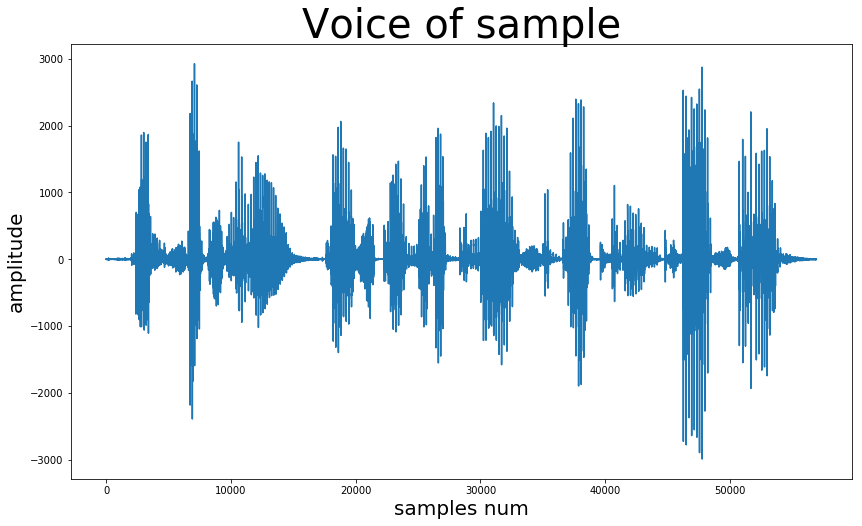

In [17]:
plt.figure(figsize=(14,8))
plt.plot(np.linspace(0,len(samples),len(samples)),samples) 
#np.linspace(): set up 3rd argument to sample_rate,otherwise default=50
plt.title("Voice of sample",fontsize=40)
plt.xlabel("samples num",fontsize=20)
plt.ylabel("amplitude",fontsize=20)
plt.show()

# 2. Frame segmentation

**Reason of Frame**  : the samples can be divided into frames because that on short time scales the audio signal doesn't change much (when we say it doesn't change, we mean statistically i.e. statistically stationary, obviously the samples are constantly changing on even short time scales).

if the frame size is too short, we can't get reliable spectral estimate, if too large, signal changed too much in one frame

In [18]:
t_feed=10 #feed time
t_frame=20 #frame time
fs=sample_rate/1000 #sample_rate of each ms
L_value=np.int(fs*t_frame)
L_value

320

In [19]:
def frame_segment(samples):
    #frame_num = K 
    frame_num=np.int((len(samples)-L_value)/(fs*t_feed))+1 #calculate the number of frames
    frame_set=[]
    for k in range(frame_num):
        frame_set.append(samples[k*np.int(fs*t_feed):k*np.int(fs*t_feed)+L_value])#[0,n] contains 0~n-1
    return frame_set,frame_num

In [25]:
frame_set,frame_num=frame_segment(samples)

# 3. Voice activity detection

In [26]:
#combined function
def voice_activity_detection(frame_set,frame_num):
    #step1:figure out the noise signal power
    mixed_power_set=[]
    for k in range(frame_num):
        mixed_power_set.append(1/(L_value)*np.sum((np.float64(frame_set[k]))**2))#use np.float64 to avoid overflow encountered in long scalars
    #step2:The noise power
    t_n=100
    frame_drop=np.int((t_n/t_feed)-1)
    no_speech_set=frame_set[:frame_drop]
    noise_power_set=(1/frame_drop)*np.sum(no_speech_set)
    #step3: detective
    gamma=2.0
    mixed_power_set=pd.Series(mixed_power_set)
    train_power_set=mixed_power_set.loc[mixed_power_set>gamma*noise_power_set]
    train_frame_set=[]
    for index in train_power_set.index:
        train_frame_set.append(frame_set[index])
    train_frame_set=np.array(train_frame_set)
    return train_frame_set

In [27]:
train_frame_set=voice_activity_detection(frame_set,frame_num)
train_frame_set.shape

(303, 320)

## Step 1:

try to figure out the noise signal power from the mixed signal power

In [28]:
mixed_power_set=[]
for k in range(frame_num):
    mixed_power_set.append(1/(L_value)*np.sum((np.float64(frame_set[k]))**2))#use np.float64 to avoid overflow encountered in long scalars

In [30]:
len(mixed_power_set)

354

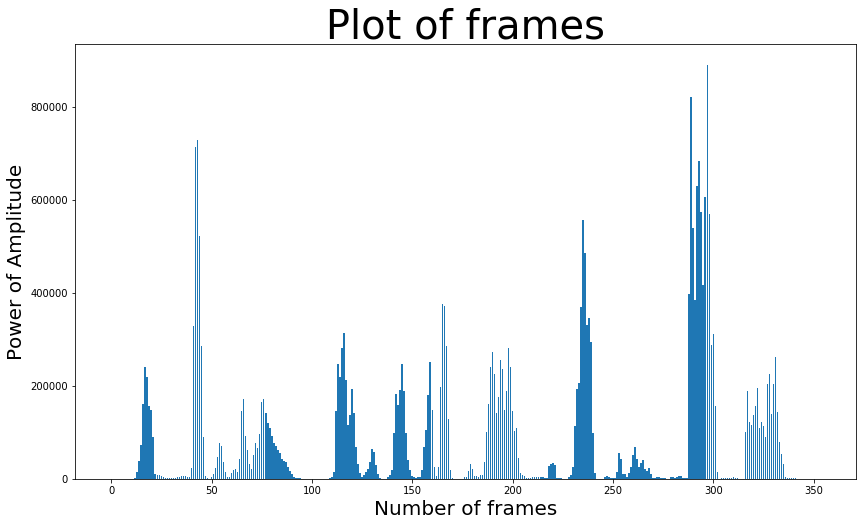

In [32]:
plt.figure(figsize=(14,8))
plt.bar(range(frame_num),mixed_power_set)  #plt,bar(index,height(value))
plt.title("Plot of frames",fontsize=40)
plt.ylabel("Power of Amplitude",fontsize=20)
plt.xlabel("Number of frames",fontsize=20)
plt.show()

## Step 2:

drop first $t_{n}$ samples becasue of silence

In [33]:
t_n=100
K_drop=np.int((t_n/t_feed)-1)

In [35]:
no_speech_set=frame_set[:K_drop]
noise_power_set=(1/K_drop)*np.sum(no_speech_set)

## Step 3

try to find a $\gamma$ as the threshold to satisfied that :
$$P(k)\lessgtr\gamma * P_{N}$$, only the frames containing speech should be used to train the classification model

In [36]:
gamma=2.0
mixed_power_set=pd.Series(mixed_power_set)

In [37]:
train_power_set=mixed_power_set.loc[mixed_power_set>gamma*noise_power_set]
train_power_set

11        350.484375
12        779.643750
13      14529.096875
14      39194.428125
15      71741.087500
16     159981.756250
17     239600.043750
18     219217.375000
19     157418.003125
20     147944.953125
21      90521.159375
22      11248.253125
23       8537.540625
24       8251.496875
25       6363.478125
26       3771.684375
27       1709.490625
28       2435.490625
29       2392.750000
30        836.228125
31       1408.478125
32       2248.937500
33       3226.865625
34       4199.665625
35       5383.706250
36       5859.137500
37       5240.287500
38       4897.734375
39       3032.731250
40      22671.318750
           ...      
310      3024.900000
311      2233.887500
312       931.840625
316    100233.306250
317    188781.050000
318    121376.384375
319    115455.496875
320    138237.175000
321    157101.178125
322    196125.740625
323    108529.915625
324    122800.396875
325    112930.512500
326     89000.459375
327    203219.696875
328    225605.446875
329    140047

In [38]:
train_frame_set=[]
for index in train_power_set.index:
    train_frame_set.append(frame_set[index])

In [39]:
train_frame_set=np.array(train_frame_set)
train_frame_set.shape

(303, 320)

# 4. Feature extraction

The next step is to calculate the power spectrum of each frame. This is motivated by the human cochlea (an organ in the ear) which vibrates at different spots depending on the frequency of the incoming sounds. 

**Window**

we use Von_Hann_Fester to minimize the effect 

In [40]:
def window_func(train_frame_set):
    window = np.hanning(len(train_frame_set[0]))
    #window = np.hamming(len(train_frame_set[0]))
    train_frame_set=np.float64(train_frame_set)
    frame_windowed_set=np.multiply(train_frame_set,window) # apply the window to the frames
    #using np.multiply , multipy by elements
    return frame_windowed_set

we plot the hanning window and see

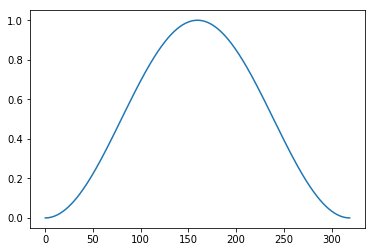

In [41]:
#window on the time domain
plt.plot(range(len(train_frame_set[0])),np.hanning(len(train_frame_set[0]))) ####
plt.show()

In [44]:
#the window on the frequency domain
pow_frames_window,mag_frames_window=Flourier_transfer(np.hanning(len(train_frame_set[0])),NFFT)

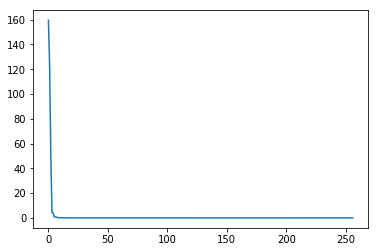

In [46]:
plt.plot(mag_frames_window)
plt.show()

In [47]:
frame_windowed_set= window_func(train_frame_set)

** Fourier-Transform and Power Spectrum**

When the DFT is computed for purely real input, the output is Hermitian-symmetric, i.e. the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms, and the negative-frequency terms are therefore redundant. This function does not compute the negative frequency terms, and the length of the transformed axis of the output is therefore n//2 + 1.

We would generally perform a 512 point FFT and keep oly the first 257 coefficents.

In [48]:
NFFT=512
#mag_frames = np.absolute(np.fft.rfft(sample_frame, NFFT))  # Magnitude of the FFT
#mag_frames = np.absolute(np.fft.fft(sample_frame, NFFT))
def Flourier_transfer(frame_windowed_set,NFFT):
    mag_frames = np.absolute(np.fft.rfft(frame_windowed_set, NFFT)) 
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2)) 
    return pow_frames,mag_frames

In [49]:
pow_frames,mag_frames=Flourier_transfer(frame_windowed_set,NFFT)

In [50]:
#leak = unwindowed
pow_frames_leak,mag_frames_leak=Flourier_transfer(train_frame_set,NFFT)

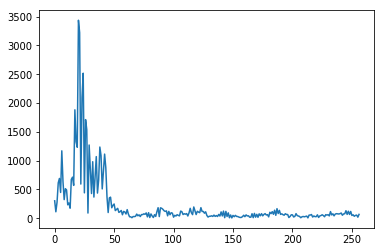

In [51]:
plt.plot(mag_frames_leak[1,:]) # without window(with spectral leakage)

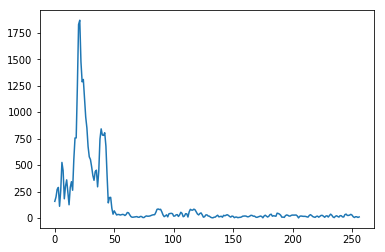

In [52]:
plt.plot(mag_frames[1,:]) # the frequency of each frame(with window)

**Mel Scale Function**

In [53]:
def Mel_scale(freq_orig):
    if freq_orig <= 1000:
        f_mel = freq_orig
    else:
        f_mel = 2595 * np.log10(1 + (freq_orig/2) / 700)
    return f_mel

** Mel Scale Inverse Function**

In [54]:
def Mel_scale_inv(f_mel):
    f_orig = 700 * (10**(f_mel / 2595) - 1)
    return f_orig

In [55]:
#sample_rate=16000
nfilt = 22
def mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt):
    low_freq_mel = 0
    #(sample_rate/2)??? because of rfft?
    high_freq_mel = Mel_scale(sample_rate)  # Convert Hz to Mel #Mel Scale function 
    # nfilt + 2: add the boundary points
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = Mel_scale_inv(mel_points)  # Convert Mel to Hz  # Power Spectrum # Inverse function
    bins = np.floor((NFFT + 1) * hz_points / sample_rate)
    # fbank = Figure 3.9 22 triangular filter set
    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bins[m - 1])   # left
        f_m = int(bins[m])             # center
        f_m_plus = int(bins[m + 1])    # right
        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bins[m - 1]) / (bins[m] - bins[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bins[m + 1] - k) / (bins[m + 1] - bins[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    #filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability #np.where: return the index of filter_banks == 0
    #filter_banks = 20 * np.log10(filter_banks)  # dB
    return filter_banks.T,fbank,hz_points

then we plot the mel filter bank and see

In [56]:
filter_banks,fbank,hz_points=mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt)

In [57]:
def mel_plot(fbank,hz_points):
    plt.figure(figsize=(14,8))
    plt.title("mel-filter-bank",size=30)
    plt.xlabel("frequency",size=20)
    plt.ylabel("Amplitude",size=20)
    
    for i in range(fbank.shape[0]):
        plt.plot(np.linspace(0,np.int32(hz_points[-1]),(NFFT+2)/2),fbank[i])
    plt.show()

/Users/Mata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

object of type <class 'float'> cannot be safely interpreted as an integer.



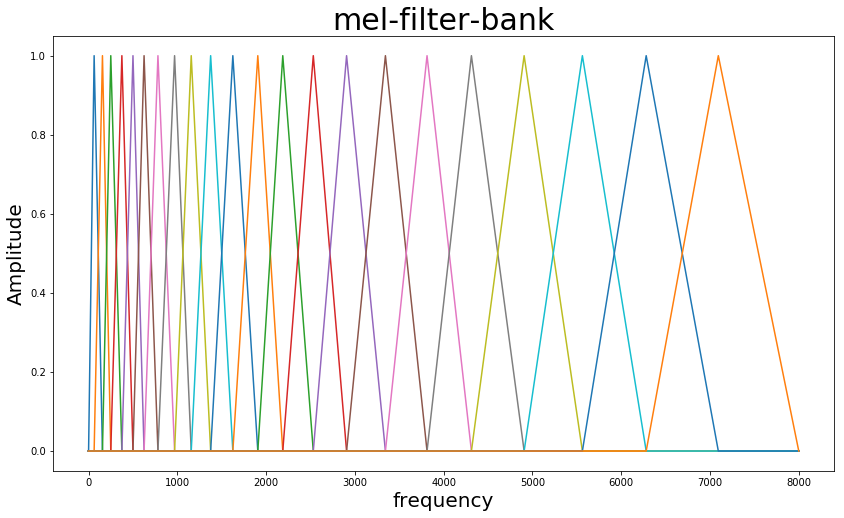

In [58]:
mel_plot(fbank,hz_points)

calculate the feature vectore $\underline{b}$ using DCT

In [59]:
num_features = 15 
#b_n = np.zeros((num_features,303))
#train_frame_set = (303,320)
def DCT(Y,num_features):
    b_n =0
    b_set=[]
    for n_value in range(num_features):    
        for m in range(Y.shape[0]):
            b_n=np.around(np.log10(Y[m]))*np.cos(np.around(math.pi*(n_value+1)*(m-0.5)/(Y.shape[0])))#ignore the mean a
            #abandon the n=0
        b_set.append(b_n)
    b_set=np.array(b_set)
    return b_set

In [60]:
b_new = DCT(filter_banks,num_features)
b_new.shape

(15, 303)

In [61]:
ubm_dataset=loadmat("/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)
#ubm_dataset=loadmat("C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\UBM_GMMNaive_MFCC_Spectrum0to8000Hz.mat",mat_dtype=True)

In [62]:
ubm_dataset.keys()

dict_keys(['__header__', '__version__', '__globals__', 'var', 'K', 'weights', 'D', 'means'])

In [63]:
ubm_means=ubm_dataset['means']
ubm_var = ubm_dataset['var']
ubm_weights = ubm_dataset['weights']
ubm_var_set=[]
K_value=49

#transfer variance of UBM to cov
for k in range(K_value):
    ubm_var_set.append(np.diag(ubm_var[k]))
ubm_var_set=np.array(ubm_var_set)
ubm_var=ubm_var_set

In [64]:
ubm_means.shape

(49, 15)

# 5. Probabilistic model of speech

## 5.1: Universal Background Model

naive GMM-UBM --**ubm_value_set:**$$P_{UBM}(\underline{b})=\sum_{k=1}^{K}\omega_{UBM,k}*p(\underline{b}|\underline{\mu}_{UBM,k},C_{UBM,k})$$

In [67]:
K_value=ubm_var.shape[0] #number of naive models
T_value=b_new.shape[1] #number of frames

In [69]:
#calculate the naive GMM-UBM
def naive_G_U(b_new,ubm_means,ubm_var,ubm_weights,T_value):
    ubm_value_set=[]
    for t in range(T_value): 
        prob_ubm=[]
        for i in range(K_value):
            ubm_pdf=multivariate_normal.pdf(b_new[:,t],ubm_means[i,:],ubm_var[i,:,:])
            prob_ubm.append(ubm_pdf)
        prob_ubm=np.array(prob_ubm)
        ubm_value = np.dot(ubm_weights,prob_ubm)
        #ubm_value = np.dot(ubm_weights,prob_ubm).flatten()
        ubm_value_set.append(ubm_value)
    ubm_value_set=np.array(ubm_value_set)
    return ubm_value_set

In [70]:
ubm_value_set=naive_G_U(b_new,ubm_means,ubm_var,ubm_weights,T_value)

## 5.2 Speaker models adaption

GMM model for a particular speaker with his training data is adapted from the UBM-GMM in equation by modifying the parameters $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$,first we calcualte the posteriori probability $$p=\frac{a}{b},1\leq t\leq T$$

### 5.2.1 posteriori probability

In [72]:
def post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value):
    model_set=[] #include 49 models
    for k in range(K_value):
        frame_set=[] #include number of frames
        for t in range(T_value):
            frame_set.append(ubm_weights[:,k]*multivariate_normal.pdf(b_new[:,t],ubm_means[k,:],ubm_var[k,:,:])/ubm_value_set[t,:])
        frame_set=np.array(frame_set)
        model_set.append(frame_set)
    model_set=np.array(model_set)
    return model_set.reshape(model_set.shape[0],model_set.shape[1])

In [73]:
model_set=post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value)

In [78]:
model_set.shape

(49, 303)


### 5.2.2 Mean

In [74]:
def mu_model(model_set,b_new):
    value_temp=np.dot(model_set,b_new.T)
    mu_ubm=np.multiply((1/np.sum(model_set,axis=1)),value_temp.T)
    return mu_ubm.T

In [75]:
mu_ubm=mu_model(model_set,b_new)

In [79]:
mu_ubm.shape

(49, 15)

### 5.2.3 Covariance

In [76]:
def cov_model(model_set,b_new,mu_ubm,T_value):
    value_temp = []
    b_temp = []
    sum_temp=[]
    mu_temp =[]
    cov_set =[]
    #calculate mu*mu.T
    for m in range(K_value):
        mu_temp.append(np.dot(mu_ubm[m,:].reshape(-1,1),mu_ubm[m,:].reshape(1,-1)))
    mu_temp=np.array(mu_temp)
    #calculate b*b.T
    for t in range(T_value):
        b_temp.append(np.dot(b_new[:,t].reshape(-1,1),b_new[:,t].reshape(1,-1)))
    b_temp=np.array(b_temp)
    #calculate sum(p(k|b)*b*b.T)
    value_temp=np.dot(model_set,b_temp.reshape(b_temp.shape[0],-1))
    value_temp=value_temp.reshape(K_value,15,15)
    #sum(p(k|b))
    sum_value = np.sum(model_set,axis=1)
    #calculate cov
    for k in range(K_value):
        cov_set.append(value_temp[k,:,:]*(1/sum_value[k])-mu_temp[k,:,:])
    cov_set=np.array(cov_set)
    return cov_set

In [77]:
cov_set=[]
cov_set = cov_model(model_set,b_new,mu_ubm,T_value)
cov_set.shape

(49, 15, 15)

### 5.2.4 Weight 

weight of K mode

In [81]:
def weight_model(model_set,T_value):
    return (1/T_value)*np.sum(model_set,axis=1)

In [82]:
weights_model=weight_model(model_set,T_value)

In [83]:
weights_model.shape

(49,)

In [84]:
np.sum(weights_model)

1.0

## 5.3 Speaker model adaption

Now we combine the parameters $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$ of the k_th mode of the UBM-GMM with $\omega_{UBM,k},\mu_{UBM,k},C_{UBM,K}$ to obtain the paramenters of the adapted k-th mode of the speaker specific GMM:
$$p=\frac{a}{b},1\leq t\leq T$$

In [85]:
#gamma_UBM = 0.0000000000000000000000000000000001 
#gamma_UBM=0.1
#alpha = np.sum(model_set,axis=1)/(gamma_UBM+np.sum(model_set,axis=1))

Function:adapted_mode to update k_th mode of the speaker specific GMM

In [86]:
def adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights,gamma_UBM=0.1):
    
    #caculate alpha
    alpha = np.sum(model_set,axis=1)/(gamma_UBM+np.sum(model_set,axis=1))
    
    #caculate the adapted mean
    new_mu=np.multiply(alpha,mu_ubm.T)+np.multiply((1-alpha),ubm_means.T)
    
    #calculate adapted variance    
    new_cov=np.multiply(alpha,cov_set.T)+np.multiply((1-alpha),ubm_var.T)

    #calculate adapted mean
    new_weight=np.multiply(alpha,weights_model)+np.multiply((1-alpha),ubm_weights.ravel())
    return new_mu.T,new_cov.T,new_weight

Function:save_model() to store the set of paraments for each model

In [87]:
def save_model(name,new_mu,new_cov,new_weight):
    #save_path="C:\\Users\\hasee\\workspace\\workspace\\lab\\patRecDat\\forStudents\\ubm\\"\
    save_path="/Users/Mata/Documents/2017/学习/ws2017:18/PUL/forStudents/ubm/"\
    +str(name)+".mat"
    savemat(save_path,{'mu':new_mu,'new_cov':new_cov,'new_weight':new_weight})   

In [88]:
new_mu,new_cov,new_weight=adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights)

In [89]:
save_model('mrpc0',new_mu,new_cov,new_weight)

# 6: Speaker identification

In [93]:
#identification
def identification(b_test,new_mu,new_cov,new_weight,T_value):
    #caculate the concatenated probability
    test_pdf=naive_G_U(b_test,new_mu,new_cov,new_weight,T_value)
    concate_prob=np.sum(np.log(test_pdf))
    return concate_prob

In [94]:
concate_prob=identification(b_new,new_mu,new_cov,new_weight,T_value)

# 7. Cross Validation

In [95]:
def feature_eng(dataset):
    #2. frame_segmentation
    frame_set,frame_num=frame_segment(dataset)
    
    #3. Voice activaty detection
    train_frame_set=voice_activity_detection(frame_set,frame_num)
    
    #4.1 window_func
    frame_windowed_set= window_func(train_frame_set)
    
    #4.2 fft
    pow_frames,mag_frames=Flourier_transfer(frame_windowed_set,NFFT)
    
    #4.3 filtered
    filter_banks,fbank,hz_points=mel_filter_bank(sample_rate,NFFT,pow_frames,nfilt)
    
    #4.4 get featured 
    b_new = DCT(filter_banks,num_features)
    return b_new

In [96]:
def speaker_adapted(b_new,ubm_means,ubm_var,ubm_value_set,T_value):
    model_set=post_prob_model(b_new,ubm_weights,ubm_means,ubm_var,ubm_value_set,T_value)
    
    mu_ubm=mu_model(model_set,b_new)
    
    cov_set = cov_model(model_set,b_new,mu_ubm,T_value)
    
    weights_model=weight_model(model_set,T_value)
    
    new_mu,new_cov,new_weight=adapted_mode(model_set,mu_ubm,ubm_means,cov_set,ubm_var,weights_model,ubm_weights)
    
    return new_mu,new_cov,new_weight

In [97]:
#default 
t_feed=10 #feed time
t_frame=20 #frame time
sample_rate=16000
fs=sample_rate/1000 #sample_rate of each ms
L_value=np.int(fs*t_frame)
NFFT=512
nfilt=22

whole_set=dataset.get('mrpc0','no such file').copy() 
print("now the this model is for person "+"mrpc0")
print("Model Start")
#add copy to prevent original change
score_set=[]
start=time.time()
for iters,item in enumerate(whole_set):
    tempset=whole_set.copy()
    tempset.remove(item)
    print("iteration "+str(iters)+" start")
    train_set=np.concatenate(tempset)
    test_set=np.array(item)
    
    K_value=ubm_var.shape[0] #number of naive models
    
    b_train=feature_eng(train_set)
    b_test=feature_eng(test_set)
    
    T_value=b_train.shape[1] #number of frames
    #5.1 naive GMM-UBM
    ubm_value_set=naive_G_U(b_train,ubm_means,ubm_var,ubm_weights,T_value)
    
    #5.2 Speaker adaption
    new_mu,new_cov,new_weight=speaker_adapted(b_train,ubm_means,ubm_var,ubm_value_set,T_value)
    #print(b_test.shape,new_mu.shape,new_cov.shape,new_weight.shape)
    #6 indentification
    T_value=b_test.shape[1]
    scores=identification(b_test,new_mu,new_cov,new_weight,T_value)
    print(" iteration "+ str(iters)+ " has scores "+str(scores))
    score_set.append(scores)
    print("cost time %5.1fmin"%((time.time()-start)/60))


now the this model is for person mrpc0
Model Start
iteration 0 start
 iteration 0 has scores 11767.4621194
cost time   0.7min
iteration 1 start


/Users/Mata/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning:

elementwise == comparison failed; this will raise an error in the future.



 iteration 1 has scores 8662.37582753
cost time   1.6min
iteration 2 start
 iteration 2 has scores 8729.68449984
cost time   2.3min
iteration 3 start
 iteration 3 has scores 11261.3700584
cost time   3.0min
iteration 4 start
 iteration 4 has scores 7685.52317201
cost time   3.7min
iteration 5 start
 iteration 5 has scores 9251.59036403
cost time   4.3min
iteration 6 start
 iteration 6 has scores 6502.49691598
cost time   5.0min
iteration 7 start
 iteration 7 has scores 6198.99098469
cost time   5.7min
iteration 8 start
 iteration 8 has scores 7287.76915305
cost time   6.4min
iteration 9 start
 iteration 9 has scores 6668.66181885
cost time   7.1min


In [98]:
# input another person and test 
test_set=dataset.get('mpdf0','no such file')[1]

In [99]:
test_set_1=dataset.get('frng0','no such file')[1]

In [100]:
test_set

array([ 4,  4,  1, ...,  1, -2, -2], dtype=int16)

In [101]:
test_set_1

array([-2,  1, -3, ...,  4,  3,  3], dtype=int16)

In [102]:
b_test=feature_eng(test_set)
T_value=b_test.shape[1]
scores=identification(b_test,new_mu,new_cov,new_weight,T_value)
scores

8408.1572412727655

In [103]:
b_test_1=feature_eng(test_set_1)
T_value_1=b_test_1.shape[1]
scores_1=identification(b_test_1,new_mu,new_cov,new_weight,T_value_1)
scores_1

10407.229581004198